<h1 style="background-color: #FAF9F6; font-family: newtimroman; font-size: 250%; color: darkblue; border: 12px solid #A9A9A9; border-radius: 20px; padding: 15px; text-align: center;">
    <b>CO2 Emissions Project</b>
</h1>


<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h2 style="font-weight: bold; color: darkblue;">Import Libraries and Read the Data</h2

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

from IPython.display import display, HTML

plt.rcParams["figure.figsize"] = (10, 6) 
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv("co2.csv")
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h2 style="font-weight: bold; color: darkblue;">EDA</h2

In [10]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [11]:
df.rename({"Make": "make",
           "Model": "model",
           "Vehicle Class": "class",
           "Cylinders": "cylinders",
           "Transmission": "transmission",
           "Fuel Type": "fuel_type",
           "Fuel Consumption City (L/100 km)": "fuel_consumption_l",
           "Fuel Consumption Comb (mpg)": "fuel_consumption_mpg",
           "Engine Size(L)": "engine_size",
           "CO2 Emissions(g/km)": "co2"}, axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   make                              7385 non-null   object 
 1   model                             7385 non-null   object 
 2   class                             7385 non-null   object 
 3   engine_size                       7385 non-null   float64
 4   cylinders                         7385 non-null   int64  
 5   transmission                      7385 non-null   object 
 6   fuel_type                         7385 non-null   object 
 7   fuel_consumption_l                7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  fuel_consumption_mpg              7385 non-null   int64  
 11  co2                               7385 non-null   int64  
dtypes: flo

In [13]:
df.shape

(7385, 12)

In [14]:
df.describe().T

count        mean        std   min    25%  \
engine_size                       7385.0    3.160068   1.354170   0.9    2.0   
cylinders                         7385.0    5.615030   1.828307   3.0    4.0   
fuel_consumption_l                7385.0   12.556534   3.500274   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   7385.0    9.041706   2.224456   4.0    7.5   
Fuel Consumption Comb (L/100 km)  7385.0   10.975071   2.892506   4.1    8.9   
fuel_consumption_mpg              7385.0   27.481652   7.231879  11.0   22.0   
co2                               7385.0  250.584699  58.512679  96.0  208.0   

                                    50%    75%    max  
engine_size                         3.0    3.7    8.4  
cylinders                           6.0    6.0   16.0  
fuel_consumption_l                 12.1   14.6   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.2   20.6  
Fuel Consumption Comb (L/100 km)   10.6   12.6   26.1  
fuel_consumption_mpg               27.0   32.0   69.0  
co2                               246.0  288.0  522.0

In [15]:
df.isnull().sum()

make                                0
model                               0
class                               0
engine_size                         0
cylinders                           0
transmission                        0
fuel_type                           0
fuel_consumption_l                  0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
fuel_consumption_mpg                0
co2                                 0
dtype: int64

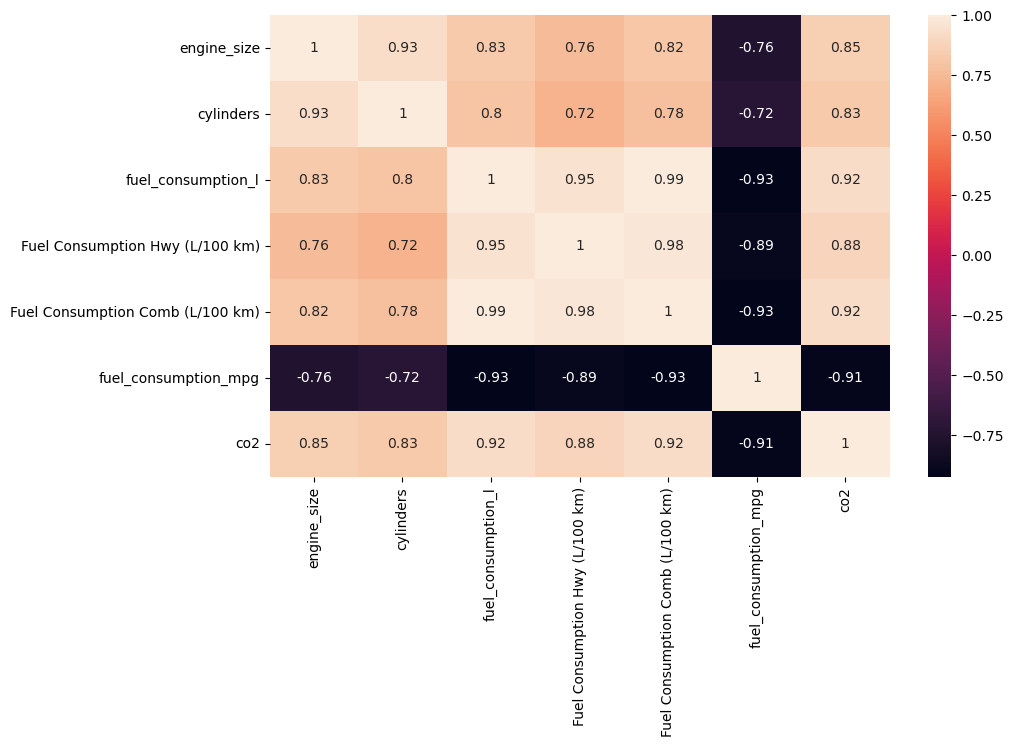

In [16]:
sns.heatmap(data=df.corr(numeric_only = True), annot=True);

In [17]:
def color_red_val(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'white'
    return f' color:{color}'

pd.DataFrame(df).corr(numeric_only = True).style.applymap(color_red_val)

<h1 style="background-color: #FAF9F6; font-family: newtimroman; font-size: 200%; color: darkblue; border:7px solid #A9A9A9; border-radius: 20px; padding: 15px; text-align: center;">
    <b>Simple Linear Regression</b>
</h1>


In [18]:
df1 = df[["engine_size", "co2"]]
df1

engine_size  co2
0             2.0  196
1             2.4  221
2             1.5  136
3             3.5  255
4             3.5  244
...           ...  ...
7380          2.0  219
7381          2.0  232
7382          2.0  240
7383          2.0  232
7384          2.0  248

[7385 rows x 2 columns]

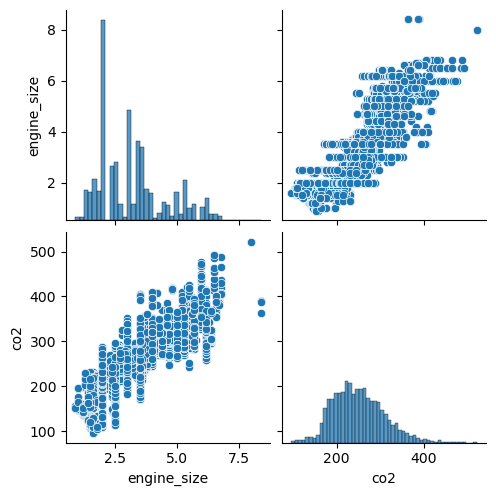

In [19]:
sns.pairplot(df1);

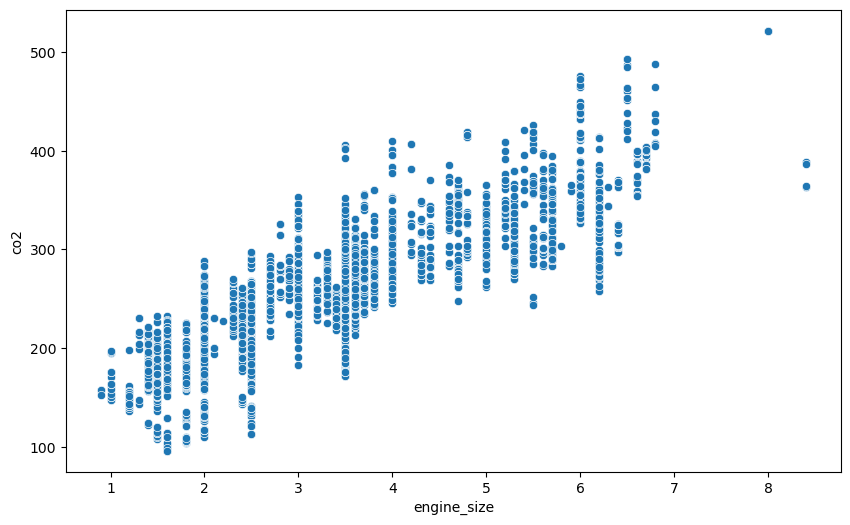

In [20]:
sns.scatterplot(x = "engine_size", y = "co2", data = df1);

In [21]:
corr = df1.co2.corr(df.engine_size)

R2_score = corr ** 2
R2_score

0.7244472046524075

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h2 style="font-weight: bold; color: darkblue;">Splittin the Data</h2

In [22]:
X = df1["engine_size"]
y = df1["co2"]

In [23]:
# b1 = slope - b0 = intercept

b1, b0 = np.polyfit(X, y, deg=1)

In [24]:
print("b1  :", b1)
print("b0  :", b0)

b1  : 36.77731518641939
b0  : 134.3658927234949


In [25]:
y_pred = b1*X + b0
y_pred

0       207.920523
1       222.631449
2       189.531866
3       263.086496
4       263.086496
           ...    
7380    207.920523
7381    207.920523
7382    207.920523
7383    207.920523
7384    207.920523
Name: engine_size, Length: 7385, dtype: float64

In [26]:
values = {"actual": y, "predicted": y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

actual   predicted   residual          LSE
0        196  207.920523 -11.920523   142.098871
1        221  222.631449  -1.631449     2.661626
2        136  189.531866 -53.531866  2865.660624
3        255  263.086496  -8.086496    65.391416
4        244  263.086496 -19.086496   364.294325
...      ...         ...        ...          ...
7380     219  207.920523  11.079477   122.754808
7381     232  207.920523  24.079477   579.821208
7382     240  207.920523  32.079477  1029.092838
7383     232  207.920523  24.079477   579.821208
7384     248  207.920523  40.079477  1606.364469

[7385 rows x 4 columns]

In [27]:
df_2.LSE.sum()

6966208.685372684

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h2 style="font-weight: bold; color: darkblue;">Prediction with Simple Linear Regression</h2

In [28]:
potential_engine = np.linspace(0,9.5,100)
potential_engine

array([0.        , 0.0959596 , 0.19191919, 0.28787879, 0.38383838,
       0.47979798, 0.57575758, 0.67171717, 0.76767677, 0.86363636,
       0.95959596, 1.05555556, 1.15151515, 1.24747475, 1.34343434,
       1.43939394, 1.53535354, 1.63131313, 1.72727273, 1.82323232,
       1.91919192, 2.01515152, 2.11111111, 2.20707071, 2.3030303 ,
       2.3989899 , 2.49494949, 2.59090909, 2.68686869, 2.78282828,
       2.87878788, 2.97474747, 3.07070707, 3.16666667, 3.26262626,
       3.35858586, 3.45454545, 3.55050505, 3.64646465, 3.74242424,
       3.83838384, 3.93434343, 4.03030303, 4.12626263, 4.22222222,
       4.31818182, 4.41414141, 4.51010101, 4.60606061, 4.7020202 ,
       4.7979798 , 4.89393939, 4.98989899, 5.08585859, 5.18181818,
       5.27777778, 5.37373737, 5.46969697, 5.56565657, 5.66161616,
       5.75757576, 5.85353535, 5.94949495, 6.04545455, 6.14141414,
       6.23737374, 6.33333333, 6.42929293, 6.52525253, 6.62121212,
       6.71717172, 6.81313131, 6.90909091, 7.00505051, 7.10101

In [29]:
y_pred_slr = b1 * potential_engine + b0
y_pred_slr

array([134.36589272, 137.89502903, 141.42416534, 144.95330164,
       148.48243795, 152.01157425, 155.54071056, 159.06984686,
       162.59898317, 166.12811948, 169.65725578, 173.18639209,
       176.71552839, 180.2446647 , 183.773801  , 187.30293731,
       190.83207362, 194.36120992, 197.89034623, 201.41948253,
       204.94861884, 208.47775514, 212.00689145, 215.53602776,
       219.06516406, 222.59430037, 226.12343667, 229.65257298,
       233.18170928, 236.71084559, 240.2399819 , 243.7691182 ,
       247.29825451, 250.82739081, 254.35652712, 257.88566343,
       261.41479973, 264.94393604, 268.47307234, 272.00220865,
       275.53134495, 279.06048126, 282.58961757, 286.11875387,
       289.64789018, 293.17702648, 296.70616279, 300.23529909,
       303.7644354 , 307.29357171, 310.82270801, 314.35184432,
       317.88098062, 321.41011693, 324.93925323, 328.46838954,
       331.99752585, 335.52666215, 339.05579846, 342.58493476,
       346.11407107, 349.64320738, 353.17234368, 356.70

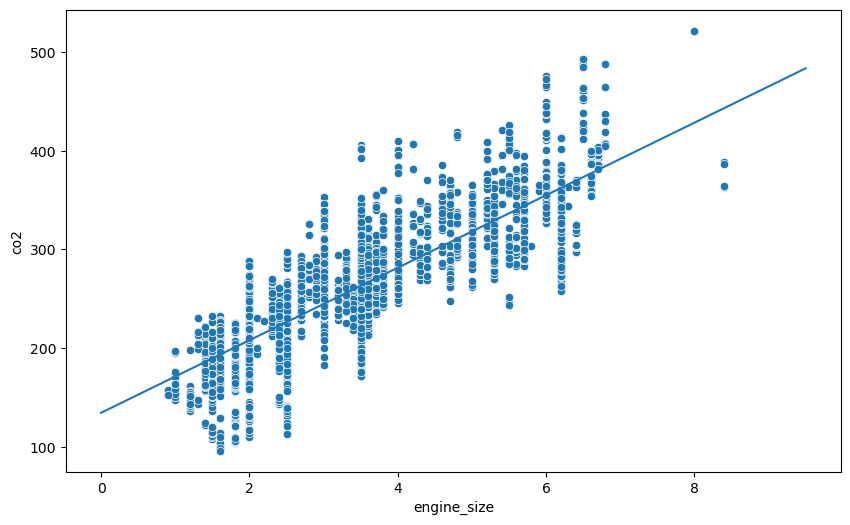

In [30]:
plt.plot(potential_engine, y_pred_slr)
sns.scatterplot(x="engine_size", y="co2", data=df1);

<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h2 style="font-weight: bold; color: darkblue;">Higher Complexity</h2

In [31]:
coefficients = np.polyfit(X, y, deg=4)
a1 = coefficients[0]
a2 = coefficients[1]
a3 = coefficients[2]
a4 = coefficients[3]
a0 = coefficients[4]

In [32]:
y_pred_poly = a1*potential_engine**4 + a2*potential_engine**3 + a3*potential_engine**2 + a4*potential_engine + a0
y_pred_poly

array([ 95.33320742, 101.35682675, 107.31822504, 113.21563235,
       119.0473886 , 124.81194362, 130.50785707, 136.1337985 ,
       141.68854734, 147.17099289, 152.58013431, 157.91508063,
       163.17505078, 168.35937353, 173.46748754, 178.49894135,
       183.45339335, 188.33061181, 193.13047489, 197.85297059,
       202.49819682, 207.06636133, 211.55778176, 215.97288562,
       220.31221028, 224.576403  , 228.76622091, 232.882531  ,
       236.92631013, 240.89864506, 244.8007324 , 248.63387862,
       252.3995001 , 256.09912306, 259.7343836 , 263.30702771,
       266.81891122, 270.27199986, 273.66836922, 277.01020478,
       280.29980185, 283.53956566, 286.73201129, 289.87976368,
       292.98555767, 296.05223796, 299.08275912, 302.08018559,
       305.04769168, 307.9885616 , 310.90618938, 313.80407898,
       316.6858442 , 319.5552087 , 322.41600605, 325.27217967,
       328.12778284, 330.98697875, 333.85404042, 336.73335077,
       339.62940258, 342.54679851, 345.49025109, 348.46

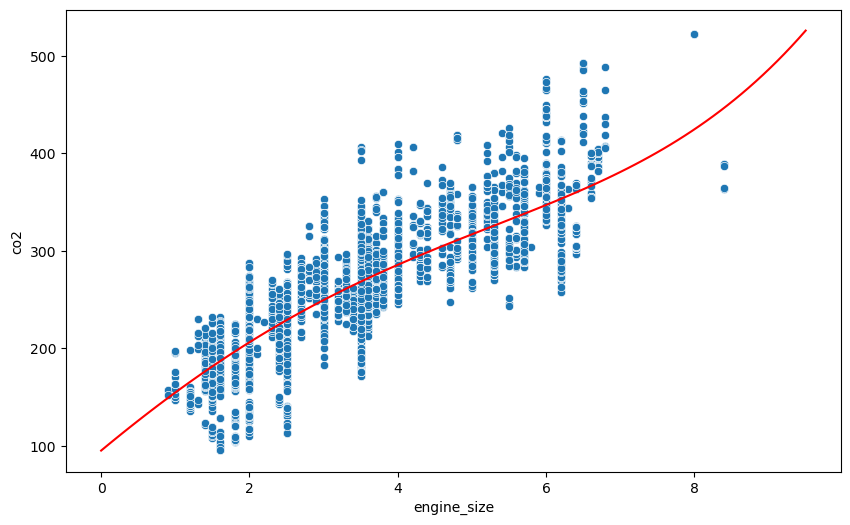

In [33]:
plt.plot(potential_engine, y_pred_poly, color="red")
sns.scatterplot(x="engine_size", y="co2", data=df1);

<h1 style="background-color: #FAF9F6; font-family: newtimroman; font-size: 200%; color: darkblue; border: 7px solid #A9A9A9; border-radius: 20px; padding: 15px; text-align: center;">
    <b>Multi Linear Regression</b>
</h1>


<div class="alert alert-warning alert-info" style="background-color: #FAF9F6; border: 5px solid #A9A9A9; border-radius: 10px;">
    <h2 style="font-weight: bold; color: darkblue;">Import Libraries</h2

In [37]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.linear_model import Ridge, RidgeCV

from sklearn.linear_model import Lasso, LassoCV

from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import GridSearchCV

In [34]:
df.sample(10)

make            model                  class  engine_size  \
296        DODGE      AVENGER FFV               MID-SIZE          3.6   
1635    INFINITI             QX60            SUV - SMALL          3.5   
3049  MITSUBISHI           LANCER                COMPACT          2.0   
3398         BMW       440i COUPE                COMPACT          3.0   
1031  VOLKSWAGEN               CC                COMPACT          2.0   
6930       HONDA             HR-V  STATION WAGON - SMALL          1.8   
7223      NISSAN    370Z Roadster             TWO-SEATER          3.7   
49          AUDI        R8 SPYDER             TWO-SEATER          4.2   
3646        FORD         EXPLORER         SUV - STANDARD          2.3   
3990     LINCOLN  CONTINENTAL AWD              FULL-SIZE          3.7   

      cylinders transmission fuel_type  fuel_consumption_l  \
296           6           A6         E                17.0   
1635          6          AV7         Z                11.4   
3049          4          AV6         X                 8.6   
3398          6          AS8         Z                11.1   
1031          4           A6         Z                11.1   
6930          4           AV         X                 8.4   
7223          6           M6         Z                13.6   
49            8           A7         Z                17.6   
3646          4          AS6         X                12.6   
3990          6          AS6         X                14.3   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
296                              11.2                              14.4   
1635                              8.5                              10.1   
3049                              6.8                               7.8   
3398                              7.8                               9.6   
1031                              7.9                               9.7   
6930                              7.0                               7.8   
7223                              9.7                              11.8   
49                               11.0                              14.6   
3646                              8.6                              10.8   
3990                              9.7                              12.2   

      fuel_consumption_mpg  co2  
296                     20  230  
1635                    28  232  
3049                    36  181  
3398                    29  224  
1031                    29  223  
6930                    36  181  
7223                    24  279  
49                      19  336  
3646                    26  254  
3990                    23  287